In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn import tree

In [2]:
forecastData = pd.read_csv("D:\datas\python\dachuang\\typhoon(CHINA)\台风预测值与真实值对照数据（12小时版）（原版） - 副本 - 副本.csv")

In [3]:
forecastData

,nums,time+0,lon+0,lat+0,power+0,speed+0,pressure+0,time+1,lon+1,lat+1,power+1,speed+1,pressure+1,forecastLon,forecastLat,forecastPressure,forecastSpeed
0,200902.0,2009/5/5 2:00,112.3,11.4,10.0,25.0,985.0,2009/5/6 2:00,113.3,14.2,NaN,NaN,NaN,112.5,13.5,985.0,25.0
1,200902.0,2009/5/5 8:00,112.3,11.4,10.0,25.0,985.0,2009/5/6 8:00,113.2,13.2,NaN,NaN,NaN,112.9,13.5,980.0,30.0
2,200902.0,2009/5/5 14:00,112.0,11.8,10.0,25.0,985.0,2009/5/6 14:00,112.6,12.8,NaN,NaN,NaN,113.9,14.1,980.0,30.0
3,200902.0,2009/5/5 20:00,111.8,13.0,10.0,25.0,985.0,2009/5/6 20:00,114.8,15.0,NaN,NaN,NaN,114.7,14.4,980.0,30.0
4,200902.0,2009/5/6 2:00,112.5,13.5,10.0,25.0,985.0,2009/5/7 2:00,116.1,15.2,NaN,NaN,NaN,116.0,14.7,980.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,202306.0,2023/7/31 8:00,132.0,22.1,14.0,42.0,955.0,2023/7/31 20:00,130.7,23.7,14.0,40.0,955.0,131.1,23.4,935.0,50.0
11468,202306.0,2023/7/31 11:00,131.8,22.4,15.0,48.0,945.0,2023/7/31 23:00,130.5,23.8,15.0,50.0,940.0,130.8,23.7,935.0,50.0
11469,202306.0,2023/7/31 14:00,131.5,22.8,15.0,50.0,940.0,2023/8/1 2:00,130.0,24.0,15.0,50.0,940.0,130.3,24.0,935.0,50.0
11470,202306.0,2023/7/31 17:00,131.4,23.1,16.0,52.0,935.0,2023/8/1 5:00,129.8,24.2,16.0,55.0,930.0,129.8,24.5,935.0,50.0


In [4]:
 #forecastData = forecastData.replace(['0', 'null', ' '], [np.nan, np.nan, np.nan])     这两段已近用过了
#forecastData.to_csv("D:\datas\python\dachuang\\typhoon(CHINA)\\typhoon forecast data2.csv", index=False)

In [5]:
forecastData = forecastData.dropna()
forecastData = forecastData.reset_index(drop=True)

In [6]:
forecastDataOrigin = forecastData[['lon+0', 'lat+0', 'speed+0', 'pressure+0']]
realLat = pd.DataFrame(forecastData.loc[:, 'forecastLat'] - forecastData.loc[:, 'lat+1'], columns=['lat'])
realLon = pd.DataFrame(forecastData.loc[:, 'forecastLon'] - forecastData.loc[:, 'lon+1'], columns=['lon'])
realPressure = pd.DataFrame(forecastData.loc[:, 'forecastPressure'] - forecastData.loc[:, 'pressure+1'], columns=['pressure'])
realSpeed = pd.DataFrame(forecastData.loc[:, 'forecastSpeed'] - forecastData.loc[:, 'speed+1'], columns=['speed'])
realRoute = pd.concat([realLat, realLon], axis=1, keys=['lat', 'lon'])

In [7]:
speedVar = float(np.var(realSpeed))
speedMean = float(realSpeed.mean(axis=0))
latVar = float(np.var(realLat))
latMean = float(realLat.mean(axis=0))
lonVar = float(np.var(realLon))
lonMean = float(realLon.mean(axis=0))
pressureVar = float(np.var(realPressure))
pressureMean = float(realPressure.mean(axis=0))
realSpeed.loc[(realSpeed['speed']>-5)&(realSpeed['speed']<5), 'error'] = 'less than 1sigma'
realSpeed.loc[(realSpeed['speed']<=-5)|(realSpeed['speed']>=5), 'error'] = 'more than 1sigma'
realPressure.loc[(realPressure['pressure']>-5)&(realPressure['pressure']<5), 'error'] = 'less than 1sigma'
realPressure.loc[(realPressure['pressure']<=-5)|(realPressure['pressure']>=5), 'error'] = 'more than 1sigma'
realLat.loc[(realLat['lat']>latMean-latVar)&(realLat['lat']<latMean+latVar), 'error'] = 'less than 1sigma'
realLat.loc[(realLat['lat']<=latMean-latVar)|(realLat['lat']>=latMean+latVar), 'error'] = 'more than 1sigma'
realLon.loc[(realLon['lon']>lonMean-lonVar)&(realLon['lon']<lonMean+lonVar), 'error'] = 'less than 1sigma'
realLon.loc[(realLon['lon']<=lonMean-lonVar)|(realLon['lon']>=lonMean+lonVar), 'error'] = 'more than 1sigma'
realRoute = pd.concat([realLat, realLon], axis=1, keys=['lat', 'lon'])

In [8]:
#forecastDataOrigin = StandardScaler().fit(forecastDataOrigin)
#realPressure = StandardScaler().fit(realPressure)
#realSpeed = StandardScaler().fit(realSpeed)
#realRoute = StandardScaler().fit(realRoute)

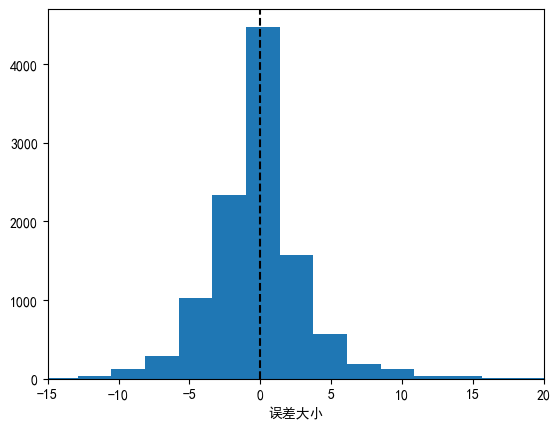

In [9]:
fig = plt.figure()
plt.hist(realSpeed['speed'], bins=20)
plt.xlim([-15,20])
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号
plt.xlabel('误差大小')
plt.axvline(0, c='k', ls='--')

,pressure,error
10192,-60.0,more than 1sigma
9099,-55.0,more than 1sigma
9100,-50.0,more than 1sigma
6823,-45.0,more than 1sigma
4726,-45.0,more than 1sigma
...,...,...
220,30.0,more than 1sigma
3276,30.0,more than 1sigma
8136,30.0,more than 1sigma
219,30.0,more than 1sigma


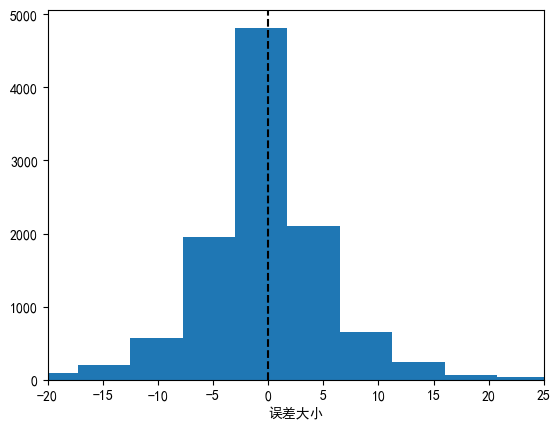

In [10]:
fig = plt.figure()
plt.hist(realPressure['pressure'], 20)
plt.xlim([-20,25])
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号
plt.xlabel('误差大小')
plt.axvline(0, c='k', ls='--')
realPressure.sort_values('pressure')

In [11]:
realSpeed.sort_values('speed')

,speed,error
157,-20.0,more than 1sigma
1728,-20.0,more than 1sigma
158,-17.5,more than 1sigma
0,-15.0,more than 1sigma
92,-15.0,more than 1sigma
...,...,...
9098,22.5,more than 1sigma
6823,25.0,more than 1sigma
9100,25.0,more than 1sigma
10192,27.5,more than 1sigma


In [12]:
originTrain1, originTest1, routeTrain, routeTest = train_test_split(forecastDataOrigin , realLat['error'], random_state=17)
originTrain2, originTest2, pressureTrain, pressureTest = train_test_split(forecastDataOrigin, realPressure['error'], random_state=17)
originTrain3, originTest3, speedTrain, speedTest = train_test_split(forecastDataOrigin, realSpeed['error'], random_state=17)

In [13]:
originTest1

,lon+0,lat+0,speed+0,pressure+0
3035,139.5,13.5,23.0,990.0
8759,121.0,30.7,28.0,978.0
10814,132.6,20.0,38.0,965.0
7434,122.9,25.7,28.0,985.0
6155,125.2,32.2,23.0,988.0
...,...,...,...,...
10394,122.3,13.9,30.0,980.0
8395,114.1,15.5,38.0,965.0
184,140.4,20.6,20.0,995.0
5620,135.1,23.6,48.0,945.0


In [14]:
pd.set_option('display.max_rows', None)
speedTrain

6402     less than 1sigma
2805     more than 1sigma
550      less than 1sigma
5264     less than 1sigma
9252     less than 1sigma
10752    less than 1sigma
9565     less than 1sigma
8963     less than 1sigma
3799     less than 1sigma
730      less than 1sigma
6319     less than 1sigma
302      more than 1sigma
8686     less than 1sigma
2530     less than 1sigma
8192     less than 1sigma
10626    less than 1sigma
2221     less than 1sigma
5320     less than 1sigma
3256     less than 1sigma
3688     less than 1sigma
2264     more than 1sigma
3709     less than 1sigma
7639     more than 1sigma
6386     less than 1sigma
7568     more than 1sigma
4161     less than 1sigma
3448     less than 1sigma
2599     less than 1sigma
2381     more than 1sigma
2323     less than 1sigma
8915     less than 1sigma
8844     more than 1sigma
10457    less than 1sigma
3397     more than 1sigma
6261     less than 1sigma
8598     more than 1sigma
3796     less than 1sigma
2001     less than 1sigma
1476     mor

In [15]:
estimator1 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=4)
estimator1.fit(originTrain1, routeTrain)
predict1 = estimator1.predict(originTest1)
estimator1.score(originTest1, routeTest)

0.7032520325203252

In [16]:
estimator2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4)
estimator2.fit(originTrain2, pressureTrain)
predict2 = estimator2.predict(originTest2)
estimator2.score(originTest2, pressureTest)

0.6452328159645233

In [17]:
estimator3 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)
estimator3.fit(originTrain3, speedTrain)
predict3 = estimator3.predict(originTest3)
estimator3.score(originTest3, pressureTest)

0.4648928307464893

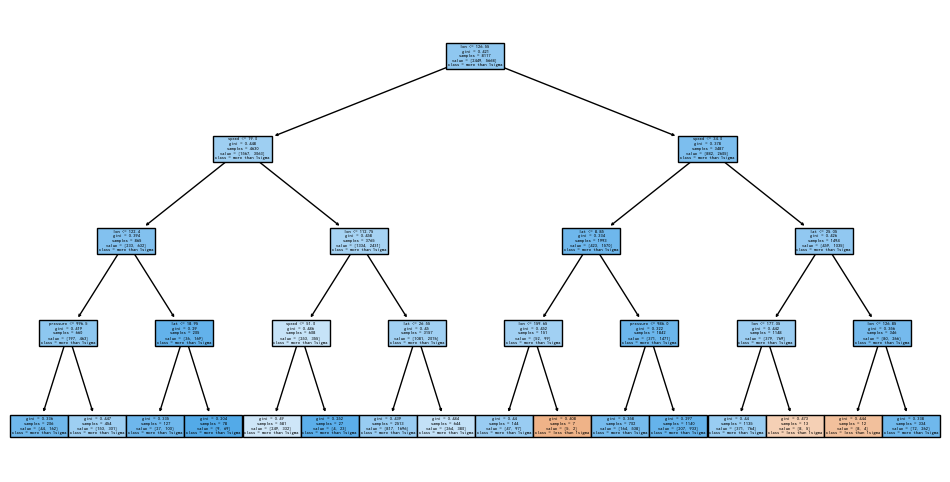

In [18]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(
    estimator1, 
    feature_names=['lon', 'lat','speed', 'pressure'],  
    class_names=['less than 1sigma', 'more than 1sigma'],
    filled=True
)
fig.savefig(".\分类结果（lat）.png", dpi=800)

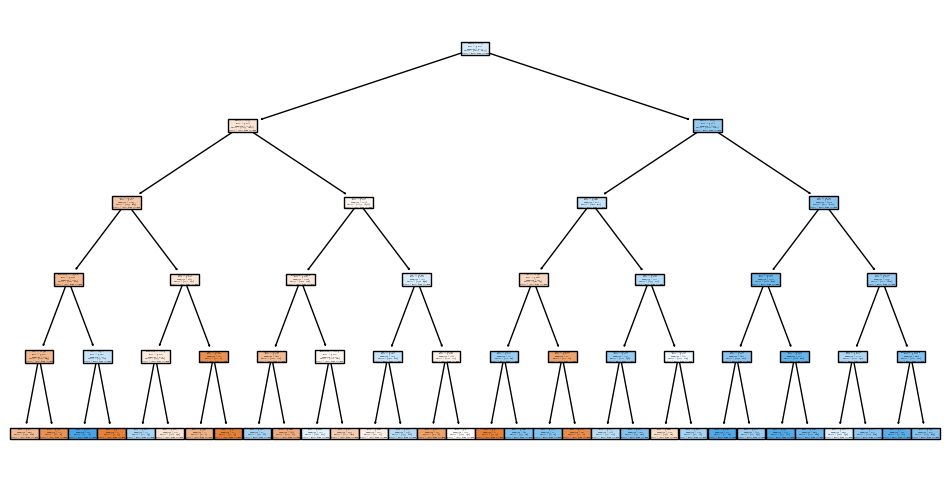

In [19]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(
    estimator2, 
    feature_names=['lon', 'lat','speed', 'pressure'],  
    class_names=['less than 1sigma', 'more than 1sigma'],
    filled=True
)
fig.savefig(".\分类结果（气压）.png", dpi=800)

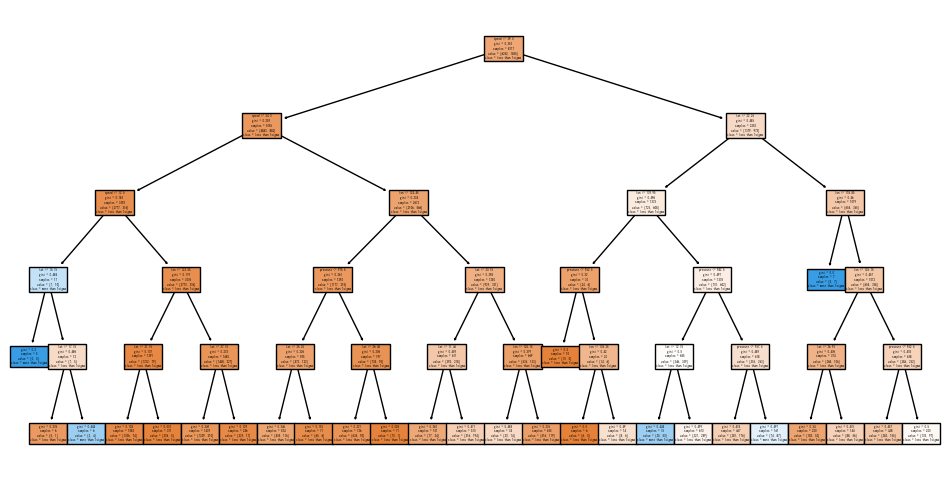

In [20]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(
    estimator3, 
    feature_names=['lon', 'lat','speed', 'pressure'],  
    class_names=['less than 1sigma', 'more than 1sigma'],
    filled=True
)
fig.savefig(".\分类结果（速度）.png", dpi=800)

In [21]:
estimator2 = DecisionTreeClassifier()
estimator2.fit(pressureTrain, originTrain2)

ValueError: could not convert string to float: 'less than 1sigma'

In [ ]:
estimator2.score(speedTest, originTest2)

In [ ]:
export_graphviz(estimator1, out_file='routeTree.dot', feature_names=['lat', 'lon', 'power', 'speed', 'pressure'])